In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.cluster import KMeans

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('C:\\Users\\User\\Downloads')

In [3]:
# open the csv file containing Iris dataset
data=pd.read_csv('Iris.csv', index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


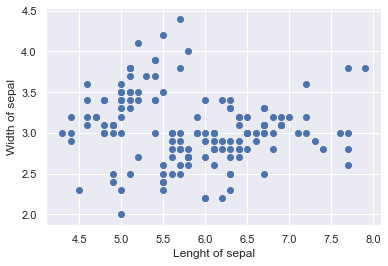

In [5]:
# Plot based on sepal_length and sepal_width
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
# name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [6]:
x=data.iloc[:,0:2]
x

,SepalLengthCm,SepalWidthCm
Id,,
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
...,...,...
146,6.7,3.0
147,6.3,2.5
148,6.5,3.0


# **SCALING THE DATA and then CLUSTERING**

In [7]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

# **The Elbow Method**

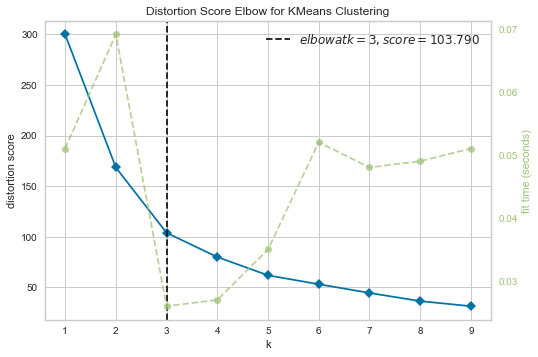

In [8]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(x_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From the above graph we can see that the number of cluster should be 3.

# **CLUSTERING SEPAL LENGTH AND SEPAL WIDTH**

In [9]:
#using Kmeans clustering
kmeans1=KMeans(3)
kmeans1.fit(x_scaled)
cluster=data.copy()
cluster['cluster_predicted_scaled_sepal']=kmeans1.fit_predict(x_scaled)

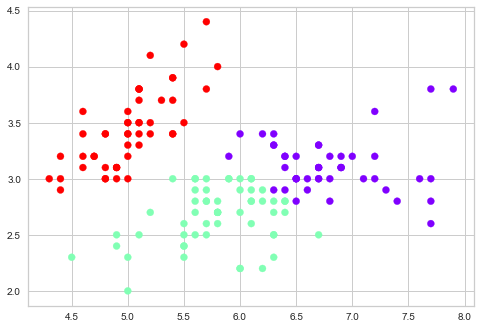

In [10]:
plt.scatter(cluster['SepalLengthCm'], cluster['SepalWidthCm'], c= cluster['cluster_predicted_scaled_sepal'], cmap = 'rainbow')

In [11]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

we can see that there are only three species of the Iris and thus it verifies our clustering into 3 clusters.

# **PETAL LENGTH and PETAL WIDTH**

In [12]:
y=data.iloc[:,2:4]
y

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0


In [13]:
#scaling y
y_scaled = preprocessing.scale(y)
y_scaled

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

In [14]:
#using Kmeans clustering
kmeans2=KMeans(3)
kmeans2.fit(y_scaled)
cluster['cluster_predicted_scaled_petal']=kmeans2.fit_predict(y_scaled)

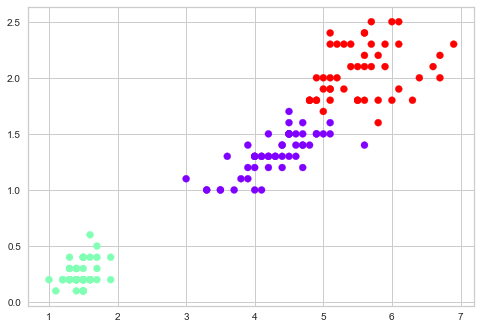

In [15]:
plt.scatter(cluster['PetalLengthCm'], cluster['PetalWidthCm'], c= cluster['cluster_predicted_scaled_petal'], cmap = 'rainbow')

# **Both Sepal and Petal**

In [16]:
z=data.iloc[:,0:4]
z

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [17]:
z_scaled = preprocessing.scale(z)
z_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

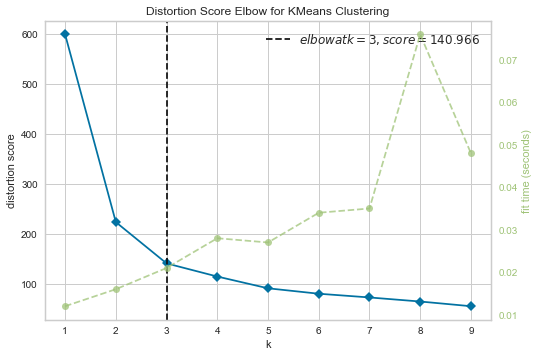

In [18]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(z_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [19]:
kmeans=KMeans(3)
kmeans.fit(z_scaled)
cluster['cluster_predicted_scaled']=kmeans.fit_predict(z_scaled)

In [20]:
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_predicted_scaled_sepal,cluster_predicted_scaled_petal,cluster_predicted_scaled
Id,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,2,1,0
2,4.9,3.0,1.4,0.2,Iris-setosa,2,1,0
3,4.7,3.2,1.3,0.2,Iris-setosa,2,1,0
4,4.6,3.1,1.5,0.2,Iris-setosa,2,1,0
5,5.0,3.6,1.4,0.2,Iris-setosa,2,1,0
...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0,2,2
147,6.3,2.5,5.0,1.9,Iris-virginica,1,2,1
148,6.5,3.0,5.2,2.0,Iris-virginica,0,2,2


In [21]:
cluster['cluster_predicted_scaled'].unique()

array([0, 2, 1])

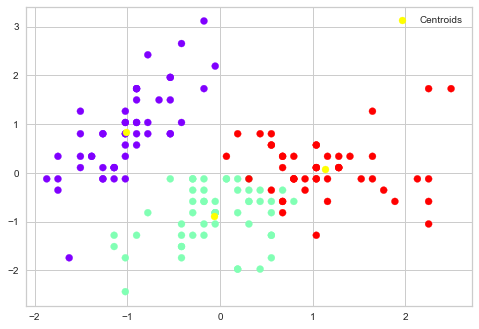

In [22]:
plt.scatter(z_scaled[:,0],z_scaled[:,1],c=cluster['cluster_predicted_scaled'], cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             c = 'yellow', label = 'Centroids')
plt.legend()

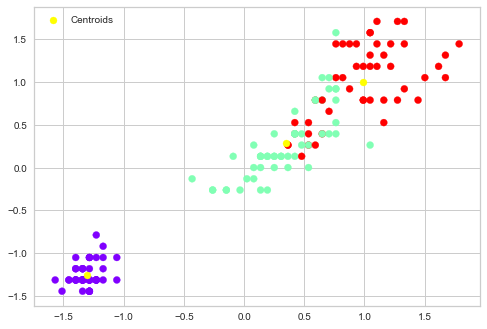

In [23]:
plt.scatter(z_scaled[:,2],z_scaled[:,3],c=cluster['cluster_predicted_scaled'], cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
             c = 'yellow', label = 'Centroids')
plt.legend()

In [24]:
kmeans.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.06881714, -0.89036741,  0.34501443,  0.28492552],
       [ 1.13140499,  0.08716178,  0.98548265,  0.99875633]])

In [27]:
cluster.to_csv("cluster.csv")